<a href="https://colab.research.google.com/github/Aksuya/InteligenciaArtificial/blob/main/Copia_de_Copia_de_Pandas_Exercise_A_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Import pandas as pd and load the dataset

In [123]:
import pandas as pd
# Use this line to load the dataset.
url='https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/cta_Ridership.csv'

bd = pd.read_csv(url)
bd

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499
...,...,...,...,...,...
1145581,41700,Washington/Wabash,12/27/2022,W,3991
1145582,41700,Washington/Wabash,12/28/2022,W,4100
1145583,41700,Washington/Wabash,12/29/2022,W,4741
1145584,41700,Washington/Wabash,12/30/2022,W,4664


Basic Exploration

Let's first take a quick look at what this data looks like.

In [124]:
# for basic exploration, we suggest to use shape, head(), tail(), dtypes, type() modules
print(bd.shape)
print('//////////////')
print(bd.head())
print('//////////////')
print(bd.tail())
print('//////////////')
print(bd.dtypes)

(1145586, 5)
//////////////
   station_id       stationname        date daytype  rides
0       41280    Jefferson Park  12/22/2017       W   6104
1       41000  Cermak-Chinatown  12/18/2017       W   3636
2       40280      Central-Lake  12/02/2017       A   1270
3       40140   Dempster-Skokie  12/19/2017       W   1759
4       40690          Dempster  12/03/2017       U    499
//////////////
         station_id        stationname        date daytype  rides
1145581       41700  Washington/Wabash  12/27/2022       W   3991
1145582       41700  Washington/Wabash  12/28/2022       W   4100
1145583       41700  Washington/Wabash  12/29/2022       W   4741
1145584       41700  Washington/Wabash  12/30/2022       W   4664
1145585       41700  Washington/Wabash  12/31/2022       A   2774
//////////////
station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object


What are some basic statistics about the data?

In [125]:
# use the describe module
bd.describe()

,station_id,rides
count,1.145586e+06,1.145586e+06
mean,4.076649e+04,3.056635e+03
std,4.490665e+02,3.118576e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,9.630000e+02
50%,4.076000e+04,2.004000e+03
75%,4.115000e+04,4.025000e+03
max,4.170000e+04,3.632300e+04


Selection Based on Conditionals

Let's see which stations have the most and fewest rides.


In [126]:
# use the min() and max() modules
summary = bd.describe()
summary = summary.loc[['min', 'max']]
summary

,station_id,rides
min,40010.0,0.0
max,41700.0,36323.0


Create a Time Index

So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group ride statistics by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

This step takes a little bit of time!

The following picture show the desired output

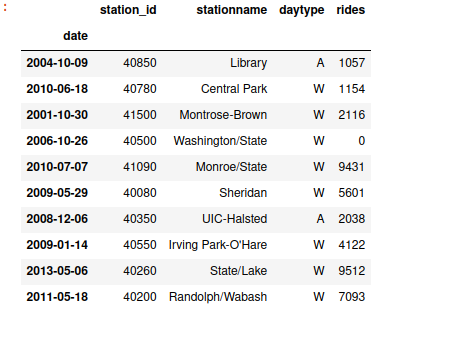

In [127]:
# hint, use to_datetime() and set_index()  modules

bd['date'] = pd.to_datetime(bd['date'])
bd.set_index('date', inplace=True)

print(bd.head())


            station_id       stationname daytype  rides
date                                                   
2017-12-22       41280    Jefferson Park       W   6104
2017-12-18       41000  Cermak-Chinatown       W   3636
2017-12-02       40280      Central-Lake       A   1270
2017-12-19       40140   Dempster-Skokie       W   1759
2017-12-03       40690          Dempster       U    499


Sort the Dataframe by Date

In [128]:
# hint, sort_values(by='date')

df_sorted = bd.sort_values(by='date')
print(df_sorted.head())


            station_id     stationname daytype  rides
date                                                 
2001-01-01       41290         Kimball       U    869
2001-01-01       40090     Damen-Brown       U    411
2001-01-01       40850         Library       U    156
2001-01-01       40650  North/Clybourn       U   1156
2001-01-01       40290    Ashland/63rd       U    540


Sanity Checking

Looks good! Now let's have a quick look at data for specific stations:
'Garfield-Dan Ryan' and 'Garfield-South Elevated'


In [129]:
# hint, use filter like, df['stationname']=='Garfield-Dan Ryan']

# use the following variable name for your specific stations
#Garfield_Dan_Ryan=pd.DataFrame()

Garfield_Dan_Ryan = df_sorted[df_sorted['stationname'] == 'Garfield-Dan Ryan']
Garfield_South_Elevated = df_sorted[df_sorted['stationname'] == 'Garfield-South Elevated']

# Verificar los datos filtrados
print("Datos para Garfield-Dan Ryan:")
print(Garfield_Dan_Ryan.head(10))

print("\nDatos para Garfield-South Elevated:")
print(Garfield_South_Elevated.head(10))




Datos para Garfield-Dan Ryan:
            station_id        stationname daytype  rides
date                                                    
2001-01-01       41170  Garfield-Dan Ryan       U   1457
2001-01-02       41170  Garfield-Dan Ryan       W   3748
2001-01-03       41170  Garfield-Dan Ryan       W   3977
2001-01-04       41170  Garfield-Dan Ryan       W   4185
2001-01-05       41170  Garfield-Dan Ryan       W   4533
2001-01-06       41170  Garfield-Dan Ryan       A   3341
2001-01-07       41170  Garfield-Dan Ryan       U   1972
2001-01-08       41170  Garfield-Dan Ryan       W   4590
2001-01-09       41170  Garfield-Dan Ryan       W   4511
2001-01-10       41170  Garfield-Dan Ryan       W   4317

Datos para Garfield-South Elevated:
            station_id              stationname daytype  rides
date                                                          
2001-01-01       40510  Garfield-South Elevated       U    248
2001-01-02       40510  Garfield-South Elevated       W    6

In [130]:
# hint, use filter like this df['stationname']=='Garfield-South Elevated']
# use the following variable name for your specific stations
#Garfield_South_Elevated=pd.DataFrame()

# Filtrar los datos para la estación 'Garfield-South Elevated'
Garfield_South_Elevated = df_sorted[df_sorted['stationname'] == 'Garfield-South Elevated']

# Verificar los datos filtrados
print("Datos para Garfield-South Elevated:")
print(Garfield_South_Elevated.head(10))


Datos para Garfield-South Elevated:
            station_id              stationname daytype  rides
date                                                          
2001-01-01       40510  Garfield-South Elevated       U    248
2001-01-02       40510  Garfield-South Elevated       W    617
2001-01-03       40510  Garfield-South Elevated       W    657
2001-01-04       40510  Garfield-South Elevated       W    697
2001-01-05       40510  Garfield-South Elevated       W    770
2001-01-06       40510  Garfield-South Elevated       A    443
2001-01-07       40510  Garfield-South Elevated       U    295
2001-01-08       40510  Garfield-South Elevated       W    695
2001-01-09       40510  Garfield-South Elevated       W    696
2001-01-10       40510  Garfield-South Elevated       W    756


Visualizing Timeseries Data

<Axes: xlabel='date'>

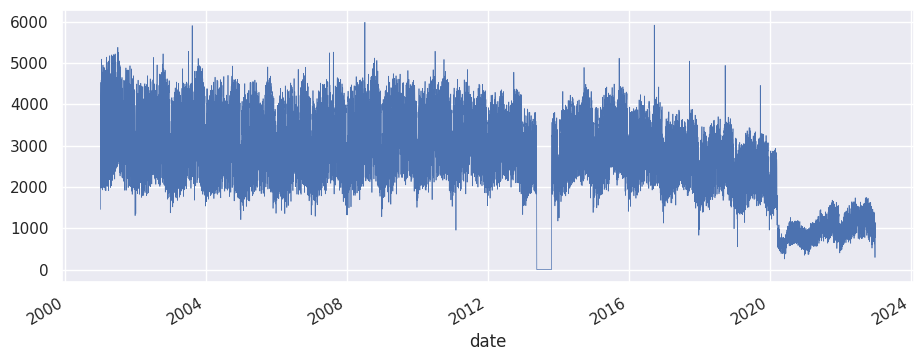

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
# Garfield_Dan_Ryan['rides'].plot(linewidth=0.5)

Garfield_Dan_Ryan = df_sorted[df_sorted['stationname'] == 'Garfield-Dan Ryan']
Garfield_Dan_Ryan['rides'].plot(linewidth=0.5)

<Axes: xlabel='date'>

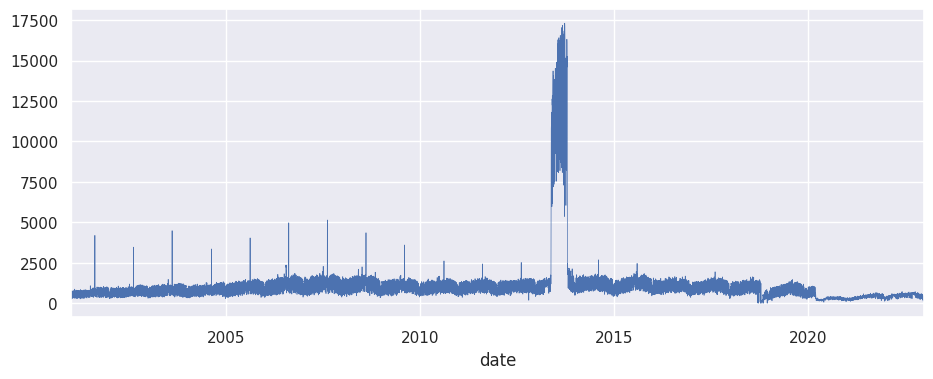

In [134]:
sns.set(rc={'figure.figsize':(11, 4)})
# Garfield_South_Elevated['rides'].plot(linewidth=0.5)

Garfield_South_Elevated = df_sorted[df_sorted['stationname'] == 'Garfield-South Elevated']
Garfield_South_Elevated['rides'].plot(linewidth=0.5)